In [24]:
import matplotlib.pyplot as plt       # matplotlib.pyplot importing
import numpy as np                    # Numpy importing
import pandas as pd                   # Pandas importing
from scipy.stats import pearsonr      # Used for the "earsonr(df['TV'],df['Sales'])[0])", Scipy personr covariance
import statsmodels.api as sm          # statsmodels.api importing
import statsmodels.formula.api as smf # statsmodels.formula.api importing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

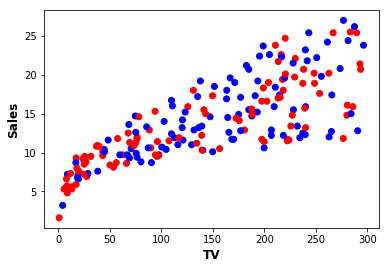

In [25]:
pd.set_option('display.max_rows',10)
pd.set_option('display.width',100)

df=pd.read_csv('Advertising.csv', sep=',', usecols=range(1,5)) # Reading cvs file omiting first column
#df=df.dropna()                  # Cleaning dataset from any row with at least one column with "NaN" values, this is optional

aColors=['red','blue'] # Selecting variables colors on the graph
xVariable=df['TV']     # Selecting our predictor variables
yVariable=df['Sales']  # Selecting our response variable
plt.scatter(xVariable,yVariable, c=aColors)         # Plotting graph, with selected colors
plt.xlabel('TV',size=12, fontweight='semibold')         # Setting x axis label with some properties
plt.ylabel('Sales',size=12, fontweight='semibold')      # Setting x axis label with some properties
plt.show()                                          # Showing in graph command, Printing result

In [26]:
def covariance(aVariable,bVariable,bias=0):                                                                                  #-
    aObservations=float(len(aVariable))                                                                                      #-
    return np.sum((aVariable-np.mean(aVariable))*(bVariable-np.mean(bVariable)))/(aObservations-min(bias,1))                 #-
#------------------------------------------------------------------------------------------------------------------------------
def standardize(cVariable):                                                                                                  #-
    return ((cVariable-np.mean(cVariable))/np.std(cVariable))                                                                #-
#------------------------------------------------------------------------------------------------------------------------------
def correlation(dVariable,eVariable,bias=0):                                                                                 #-
    return (covariance(standardize(dVariable),standardize(eVariable),bias))                                                  #-
                                                                                                                             #-
#------------------------------------------------------------------------------------------------------------------------------
#covariance(xVariable,yVariable)                                                                                             #-
print('Our correlation estimate: %0.5f' % (correlation(df['TV'],df['Sales'])))                                               #-
print('Correlation from Scipy personr estimation: %0.5f' % pearsonr(df['TV'],df['Sales'])[0])                                #-

Our correlation estimate: 0.78222
Correlation from Scipy personr estimation: 0.78222


Linear Model is:
Sales= 7.032593549127705 + 0.04753664043301969 *TV


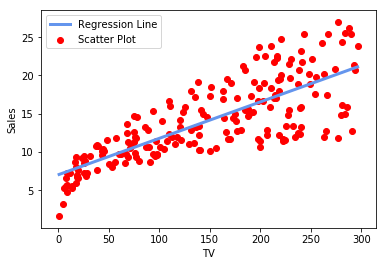

In [27]:
#-----------------REGRESSION ANALYSIS "Ordinary Least Square Method"-----------------------------------------------------------
observations = len(df)       # Total number of values                                                                        #-
xVarMean=df['TV'].mean()     # Cal. TV mean                                                                                  #-
yVarMean=df['Sales'].mean()  # Cal. Sales mean                                                                               #-
aNume = 0                    # Initializing variable                                                                         #-
aDeno = 0                    # Initializing variable                                                                         #-
for i in range(observations):  # Loop to go over observations to find b0 & b1 coefficients                                   #-
    aNume += (xVariable[i] - xVarMean) * (yVariable[i] - yVarMean)                                                           #-
    aDeno += (xVariable[i] - xVarMean) ** 2                                                                                  #-
b1 = aNume / aDeno             # b1 coefficient                                                                              #-
b0 = yVarMean - (b1 * xVarMean)# b0 coefficient                                                                              #-
print('Linear Model is:')                                                                                                    #-
print('Sales=',b0,'+',b1,'*TV')# Printing result                                                                             #-
#------------------------------------------------------------------------------------------------------------------------------
mAx_x = df['TV'].max() #+ 100
mIn_x = df['TV'].min() #- 100

# Calculating line values x and y
aX = np.linspace(mIn_x, mAx_x, 1000)
aY = b0+b1*aX

# Ploting Line
plt.plot(aX, aY, color='#6495ED', label='Regression Line',linewidth=3)
# Ploting Scatter Points
plt.scatter(xVariable, yVariable, c='red', label='Scatter Plot')

plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

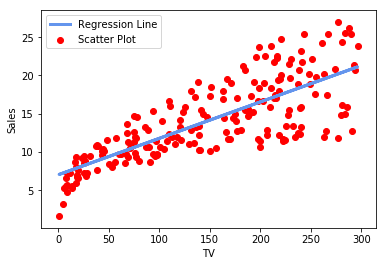

In [29]:
#-----------------REGRESSION ANALYSIS "scikit-learn approach Method"-----------------------------------------------------------
# Cannot use Rank 1 matrix in scikit learn
xVariable2 = xVariable.values.reshape((observations, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(xVariable2, yVariable)
# Y Prediction
Y_pred = reg.predict(xVariable2)

# Calculating RMSE and R2 Score
mse = mean_squared_error(yVariable, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(xVariable2, yVariable)

#print(np.sqrt(mse))
#print(r2_score)

#aX = np.linspace(mIn_x, mAx_x, 1000)
aY = reg.predict(xVariable2)
plt.plot(xVariable, aY,label='Regression Line',color='#6495ED',linewidth=3)
# Ploting Scatter Points
plt.scatter(xVariable, yVariable,color='red', label='Scatter Plot')

plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [30]:
#-----------------REGRESSION ANALYSIS "statsmodels.formula.api Method"---------------------------------------------------------

x=df['TV']
y=df['Sales']
x=sm.add_constant(x)

linear_regression=smf.ols(formula='Sales ~ TV',data=df)
fitted_model=linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           1.47e-42
Time:                        20:39:15   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

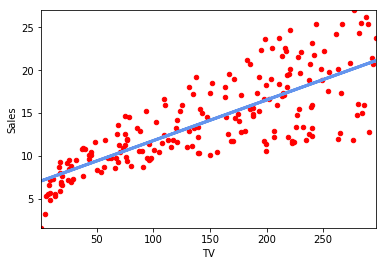

In [31]:
#-----------------------------------------------------------------------------------------------------------------------------
fitted_values=fitted_model.predict(x)                                                                                       #-
x_range=[df['TV'].min(),df['TV'].max()]                                                                                     #-
y_range=[df['Sales'].min(),df['Sales'].max()]                                                                               #-
scatter_plot=df.plot(kind='scatter',x='TV',y='Sales',color='red',xlim=x_range,ylim=y_range)                                 #-

#meanY=scatter_plot.plot(x_range,[df['Sales'].mean(),df['Sales'].mean()],'--', color='red', linewidth=1)                    #-
#meanX=scatter_plot.plot([df['TV'].mean(),df['TV'].mean()],'--',  color='red', linewidth=1)                                 #-
regression_line=scatter_plot.plot(df['TV'],fitted_values,'-',color='#6495ED', linewidth=3)                                  #-
#plt.legend()
#----------------------------------------------------------------------------------------------------------------------------

In [ ]:
Xx=df['TV']
Yy=df['Sales']
#-----------------------------------------------------------------------------------------------------------------------------
def gradient_descent(x,y):
    m_curr = b_curr =0
    iterations = 200000
    n= len(x)
    learning_rate=0.00005
    
    for i in range(iterations):
        y_predicted = m_curr*x + b_curr
        cost = (1/2*n)*sum([val**2 for val in (y - y_predicted)])
        md = -(1/n)*sum(x*(y-y_predicted))
        bd = -(1/n)*sum(y - y_predicted)
        m_curr = m_curr - learning_rate*md
        b_curr = b_curr - learning_rate*bd
        #print("m {}, b {} , cost {}, i {}".format(m_curr,b_curr, cost, i))
    print(m_curr,b_curr)
#-----------------------------------------------------------------------------------------------------------------------------
#gradient_descent(Xx,Yy)

In [33]:

My_col = df.columns
My_Standardization = StandardScaler()
Xst = My_Standardization.fit_transform(xVariable2)
original_means = My_Standardization.mean_
originanal_stds = My_Standardization.var_**.5
Xst = np.column_stack((Xst,np.ones(observations)))
y = df['Sales'].values

import random
def random_w( p ): 
    return np.array([np.random.normal() for j in range(p)])
def hypothesis(X,w):
    return np.dot(X,w)
def loss(X,w,y):
    return hypothesis(X,w) - y
def squared_loss(X,w,y):
    return loss(X,w,y)**2
def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients
def update(X,w,y, alpha=0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]
def optimize(X,y, alpha=0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and \new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
    if k % (iterations / 20) == 0:
        path.append(new_SSL)
    return w, path

alpha = 0.02

w, path = optimize(Xst, y, alpha, eta = 10**-12, iterations = 20000)
print ("These are our final standardized coefficients: " + ','.join(map(lambda xVariable: "%0.4f" % xVariable, w)))


unstandardized_betas = w[:-1] / originanal_stds
unstandardized_bias = w[-1]-np.sum((original_means /originanal_stds) * w[:-1])
print ('%8s: %8.4f' % ('bias', unstandardized_bias))
for beta,varname in zip(unstandardized_betas, My_col):
    print ('%8s: %8.4f' % (varname, beta))


These are our final standardized coefficients: 4.0710,14.0225
    bias:   7.0326
      TV:   0.0475
